In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from citipy import citipy

In [2]:
lats = np.random.uniform(low=-90.000, high = 90.000, size = 2000)
lngs = np.random.uniform(low=-180.000, high = 180.00, size = 2000)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(-18.014927111029294, -178.2603684655),
 (6.42006953880383, -154.34613176380606),
 (-15.916262961688076, 32.16847466441695),
 (82.68852359600325, -174.7338221594926),
 (-30.70155102211936, 109.97894727774849),
 (48.321868702993584, 20.767886355695083),
 (45.35669784930067, -119.46107481206195),
 (74.97706230828695, -104.30003572437838),
 (26.707148005169486, -77.41101059129355),
 (17.14592339614154, -162.90126102473047),
 (32.57342277676942, -113.37231337087425),
 (-5.763535537770849, -51.714018110594566),
 (-3.152769619821214, 65.82631417665252),
 (-44.00573214038809, 158.63722195693998),
 (30.665080473608114, 115.0794835694008),
 (-35.993427551866574, -115.2308736130205),
 (5.218813148167428, 98.58234569183031),
 (87.45216777309616, 26.391197283246925),
 (-13.18306380366434, -167.3164675633185),
 (-23.417166351064935, 156.65376115636388),
 (61.16911287824783, -84.91204919585363),
 (-34.6467208444055, -22.831807257829126),
 (-6.800822561243038, 113.47300223662512),
 (41.2455816887326

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

771

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bcc28cb783bd1227ee7242fc975ef118


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
for i in range(len(cities)):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    city_url = url + "&q=" + cities[i]

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description= city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date,
                             "Current Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 16 | pangai
Processing Record 2 of Set 16 | hilo
Processing Record 3 of Set 16 | mount darwin
Processing Record 4 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 16 | geraldton
Processing Record 6 of Set 16 | edeleny
Processing Record 7 of Set 16 | hermiston
Processing Record 8 of Set 16 | yellowknife
Processing Record 9 of Set 16 | marsh harbour
Processing Record 10 of Set 16 | kapaa
Processing Record 11 of Set 16 | sonoita
Processing Record 12 of Set 16 | sao felix do xingu
Processing Record 13 of Set 16 | hithadhoo
Processing Record 14 of Set 16 | te anau
Processing Record 15 of Set 16 | qingquan
Processing Record 16 of Set 16 | rikitea
Processing Record 17 of Set 16 | langsa
Processing Record 18 of Set 16 | longyearbyen
Processing Record 19 of Set 16 | samusu
City not found. Skipping...
Processing Record 20 of Set 16 | hervey bay
Processing Record 21 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 22 o

Processing Record 32 of Set 19 | ostrovnoy
Processing Record 33 of Set 19 | saskylakh
Processing Record 34 of Set 19 | oxford
Processing Record 35 of Set 19 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 19 | san pedro de uraba
Processing Record 37 of Set 19 | parabel
Processing Record 38 of Set 19 | harer
Processing Record 39 of Set 19 | dawlatabad
Processing Record 40 of Set 19 | banda aceh
Processing Record 41 of Set 19 | naze
Processing Record 42 of Set 19 | baykit
Processing Record 43 of Set 19 | haines junction
Processing Record 44 of Set 19 | salta
Processing Record 45 of Set 19 | umzimvubu
City not found. Skipping...
Processing Record 46 of Set 19 | elk plain
Processing Record 47 of Set 19 | ilulissat
Processing Record 48 of Set 19 | beloha
Processing Record 49 of Set 19 | teguldet
Processing Record 50 of Set 19 | coyah
Processing Record 1 of Set 20 | souillac
Processing Record 2 of Set 20 | shache
Processing Record 3 of Set 20 | chillicothe
Pr

City not found. Skipping...
Processing Record 20 of Set 23 | zabol
Processing Record 21 of Set 23 | glendive
Processing Record 22 of Set 23 | basco
Processing Record 23 of Set 23 | tabou
Processing Record 24 of Set 23 | safford
Processing Record 25 of Set 23 | hihifo
City not found. Skipping...
Processing Record 26 of Set 23 | henzada
City not found. Skipping...
Processing Record 27 of Set 23 | flin flon
Processing Record 28 of Set 23 | ondorhaan
City not found. Skipping...
Processing Record 29 of Set 23 | evensk
Processing Record 30 of Set 23 | mecca
Processing Record 31 of Set 23 | la ronge
Processing Record 32 of Set 23 | gashua
Processing Record 33 of Set 23 | coahuayana
Processing Record 34 of Set 23 | reftinskiy
Processing Record 35 of Set 23 | nome
Processing Record 36 of Set 23 | mikhaylovka
Processing Record 37 of Set 23 | sitka
Processing Record 38 of Set 23 | diamantino
Processing Record 39 of Set 23 | henties bay
Processing Record 40 of Set 23 | bojaya
City not found. Skipp

Processing Record 4 of Set 27 | halalo
City not found. Skipping...
Processing Record 5 of Set 27 | korem
Processing Record 6 of Set 27 | salalah
Processing Record 7 of Set 27 | binzhou
Processing Record 8 of Set 27 | zhangjiakou
Processing Record 9 of Set 27 | stepnyak
Processing Record 10 of Set 27 | tarves
Processing Record 11 of Set 27 | christchurch
Processing Record 12 of Set 27 | qasigiannguit
Processing Record 13 of Set 27 | eskisehir
Processing Record 14 of Set 27 | hernani
Processing Record 15 of Set 27 | verkhoyansk
Processing Record 16 of Set 27 | huilong
Processing Record 17 of Set 27 | ahuimanu
Processing Record 18 of Set 27 | marawi
Processing Record 19 of Set 27 | hastings
Processing Record 20 of Set 27 | myitkyina
Processing Record 21 of Set 27 | goundam
Processing Record 22 of Set 27 | ayagoz
Processing Record 23 of Set 27 | sao luis do quitunde
Processing Record 24 of Set 27 | todos santos
Processing Record 25 of Set 27 | richards bay
Processing Record 26 of Set 27 | 

Processing Record 39 of Set 30 | sangar
Processing Record 40 of Set 30 | ukiah
Processing Record 41 of Set 30 | upington
Processing Record 42 of Set 30 | karratha
Processing Record 43 of Set 30 | maputo
Processing Record 44 of Set 30 | idil
Processing Record 45 of Set 30 | bandarbeyla
Processing Record 46 of Set 30 | gondar
Processing Record 47 of Set 30 | pitkyaranta
Processing Record 48 of Set 30 | rosamorada
Processing Record 49 of Set 30 | coldwater
Processing Record 50 of Set 30 | hurricane
Processing Record 1 of Set 31 | mehamn
Processing Record 2 of Set 31 | jequie
Processing Record 3 of Set 31 | bako
Processing Record 4 of Set 31 | altay
Processing Record 5 of Set 31 | santa maria
Processing Record 6 of Set 31 | manzil tamim
City not found. Skipping...
Processing Record 7 of Set 31 | gorin
Processing Record 8 of Set 31 | petatlan
Processing Record 9 of Set 31 | esil
Processing Record 10 of Set 31 | teahupoo
Processing Record 11 of Set 31 | bani
Processing Record 12 of Set 31 | 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date', 'Current Description'],
      dtype='object')

In [12]:
new_column_order = ["City", "Country", "Date","Current Description","Lat", "Lng", "Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Current Description,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pangai,TO,2021-05-31 15:24:46,light rain,-19.8000,-174.3500,77.38,80,99,11.56
1,Hilo,US,2021-05-31 15:19:41,moderate rain,19.7297,-155.0900,77.29,94,90,4.61
2,Mount Darwin,ZW,2021-05-31 15:26:36,scattered clouds,-16.7725,31.5838,72.79,27,33,6.93
3,Geraldton,AU,2021-05-31 15:24:39,scattered clouds,-28.7667,114.6000,54.01,94,33,14.63
4,Edeleny,HU,2021-05-31 15:26:37,scattered clouds,48.3000,20.7333,59.45,62,44,13.18
...,...,...,...,...,...,...,...,...,...,...
695,Havoysund,NO,2021-05-31 15:22:11,overcast clouds,70.9963,24.6622,44.83,96,100,25.79
696,Beidao,CN,2021-05-31 15:30:08,overcast clouds,34.5686,105.8933,66.43,56,100,2.44
697,Hirara,JP,2021-05-31 15:30:08,overcast clouds,24.8000,125.2833,79.83,83,100,17.22
698,Aljezur,PT,2021-05-31 15:30:08,few clouds,37.3191,-8.8033,67.71,66,22,9.33


In [13]:
# Create the output file (CSV).
output_data_file = "WeatherPy_Database.csv.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

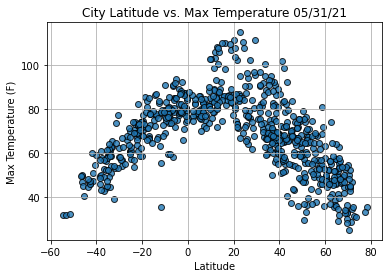

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

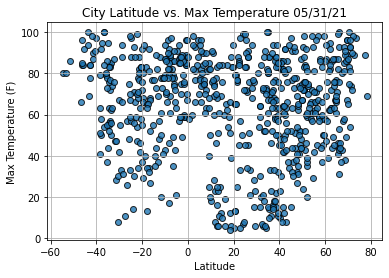

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

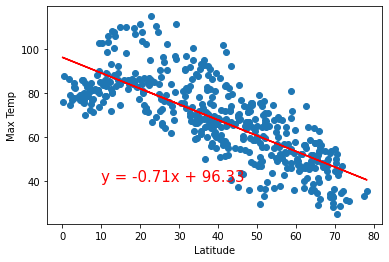

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

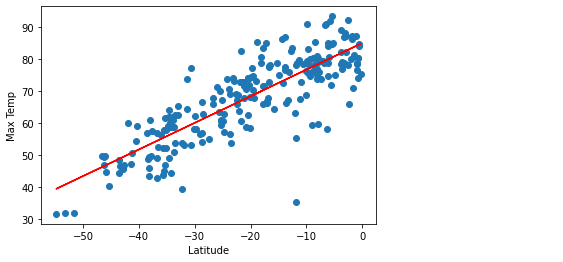

In [20]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

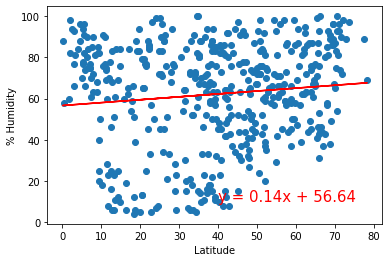

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


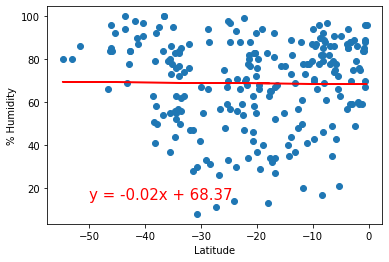

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

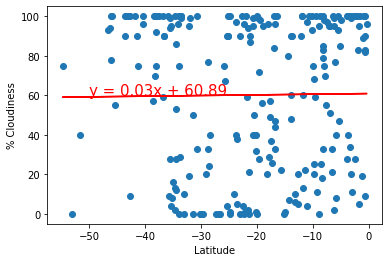

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


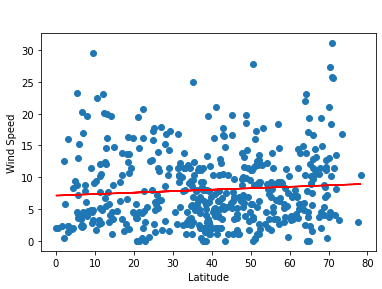

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))
